Homework 4 Park SIwon 2022340027

1. Test of greedy and ε–greedy policy

Greedy (epsilon = 0)
greedy policy로 선택할때 Q value가 같은 action 이 여러개이면 그 중에서 선택하는 걸 랜덤으로 하는 코드가 추가되어야 합니다. 

 np.flatnonzero() True인 원소의 인덱스 반환 
 zip(리스트1,리스트2)
 np.argmax()는 최댓값 인덱스 반환

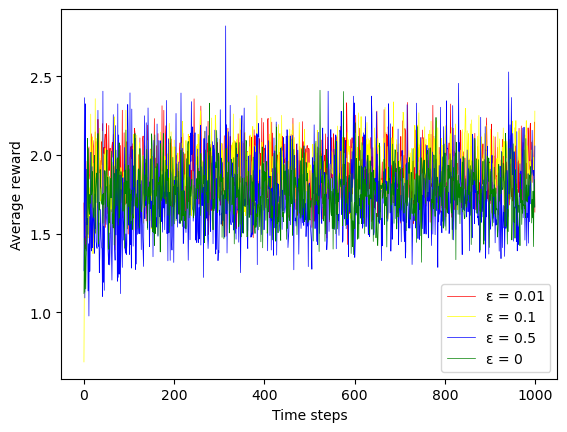

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_arms = 10
n_steps = 1000
n_trials = 2000

epsilon_values = [0.01, 0.1, 0.5, 0]
colors = ['red', 'yellow', 'blue', 'green']

P_arm = np.random.randn(n_arms)

for epsilon, color in zip(epsilon_values, colors): # zip [(0.01, 'red'), ...] 이런 식으로 묶어줌
    average_rewards = np.zeros(n_steps) # average reward에 저장하겠다

    for i in range(n_trials):
        Q_arm = np.zeros(n_arms)
        N_visits = np.zeros(n_arms)

        for j in range(n_steps):
            R_arm = np.random.normal(P_arm, 1, n_arms)

            if epsilon > 0 and np.random.rand(1) < epsilon: #epsilion이 0이면 false
            # epsilon-greedy
                action = np.random.choice(n_arms,1)
            else: 
            # greedy
                action = np.random.choice(np.flatnonzero(Q_arm == np.max(Q_arm)))  # greedy
            # Q값들 중 최댓값과 루프의 Q값이 같은 경우 true 
            #  -> true인 index반환 
            #  -> 그 중에 random 선택
            
            if N_visits[action] == 0:
                Q_arm[action] += R_arm[action]
            else:
                Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]

            N_visits[action] += 1 # action 한 곳에 + 1

            if np.argmax(R_arm) == action:
                average_rewards[j] += (R_arm[action] - average_rewards[j]) / (i + 1)

    plt.plot(average_rewards, color=color, linewidth=0.5)

plt.legend(['ε = 0.01', 'ε = 0.1', 'ε = 0.5', 'ε = 0']) #범례
plt.xlabel('Time steps')
plt.ylabel('Average reward')
plt.show()


2. Optimistic initial value. Same as Q1 except for k=12 and different initial Q values of 5, 10, 20 with 0. Compare greedy policies only. 



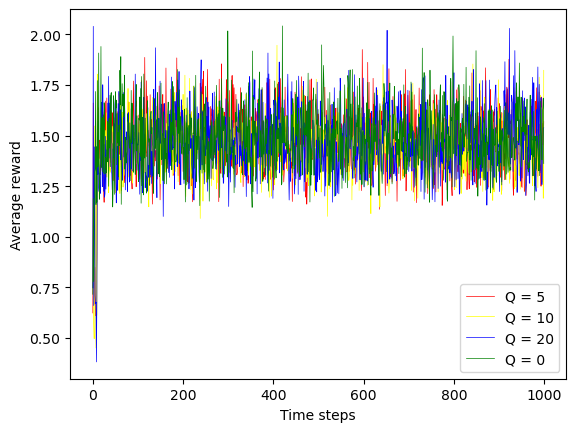

trial 수와 time step이 충분히 커서 초기 q값의 영향력이 미미해졌다.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

n_arms = 10
n_steps = 1000
n_trials = 2000
initial_q_values = [5, 10, 20, 0] # q_values = 0 이 control group

epsilon = 0 #greedy 전략만 사용
colors = ['red', 'yellow', 'blue', 'green']

P_arm = np.random.randn(n_arms)

for initial_q, color in zip(initial_q_values, colors):
    average_rewards = np.zeros(n_steps)

    for i in range(n_trials):
        Q_arm = np.ones(n_arms) * initial_q # 1111 array에 initial q_value 곱함
        N_visits = np.zeros(n_arms)

        for j in range(n_steps):
            R_arm = np.random.normal(P_arm, 1, n_arms)

            if epsilon > 0 and np.random.rand(1) < epsilon:
                action = np.random.choice(n_arms,1)
            else: 
            # greedy
                action = np.random.choice(np.flatnonzero(Q_arm == np.max(Q_arm)))
                
            if N_visits[action] == 0:
                Q_arm[action] = R_arm[action]
            else:
                Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]

            N_visits[action] += 1

            if np.argmax(R_arm) == action:
                average_rewards[j] += (R_arm[action] - average_rewards[j]) / (i + 1)

    plt.plot(average_rewards, color=color, linewidth=0.5)

plt.legend(['Q = 5', 'Q = 10', 'Q = 20', 'Q = 0'])
plt.xlabel('Time steps')
plt.ylabel('Average reward')
plt.show()
print("trial 수와 time step이 충분히 커서 초기 q값의 영향력이 미미해졌다.")



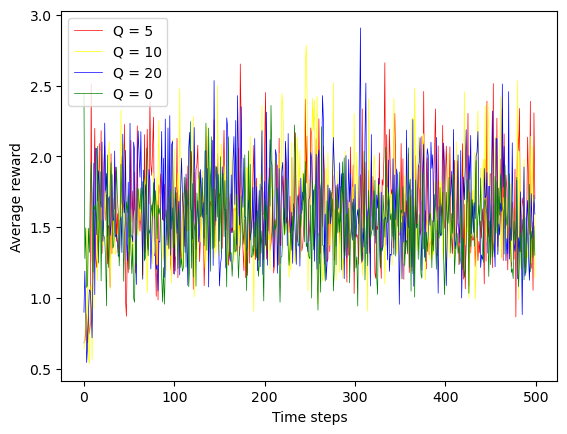

trial 수가 적어지면 initial q_value의 영향이 커진다.


In [5]:
# step을 1000 -> 500 trial수를 2000 -> 500으로 줄여서 시도
n_arms = 10
n_steps = 500
n_trials = 500
initial_q_values = [5, 10, 20, 0] # q_values = 0 이 control group

epsilon = 0 #greedy 전략만 사용
colors = ['red', 'yellow', 'blue', 'green']

P_arm = np.random.randn(n_arms)

for initial_q, color in zip(initial_q_values, colors):
    average_rewards = np.zeros(n_steps)

    for i in range(n_trials):
        Q_arm = np.ones(n_arms) * initial_q # 1111 array에 initial q_value 곱함
        N_visits = np.zeros(n_arms)

        for j in range(n_steps):
            R_arm = np.random.normal(P_arm, 1, n_arms)

            if epsilon > 0 and np.random.rand(1) < epsilon:
                action = np.random.choice(n_arms,1)
            else: 
            # greedy
                action = np.random.choice(np.flatnonzero(Q_arm == np.max(Q_arm)))
                
            if N_visits[action] == 0:
                Q_arm[action] = R_arm[action]
            else:
                Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]

            N_visits[action] += 1

            if np.argmax(R_arm) == action:
                average_rewards[j] += (R_arm[action] - average_rewards[j]) / (i + 1)

    plt.plot(average_rewards, color=color, linewidth=0.5)

plt.legend(['Q = 5', 'Q = 10', 'Q = 20', 'Q = 0'])
plt.xlabel('Time steps')
plt.ylabel('Average reward')
plt.show()
print("trial 수가 적어지면 initial q_value의 영향이 살짝 증가한다.")

3, UCB algorithm
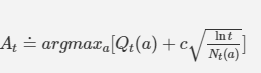

selection algorith with c=1, 1.5, 2 & 4. 
compare with the ε–greedy policy with ε= 0.1

자연로그는 np.log(x)로 표현 - 밑이 k인 로그는 np.logk(x)

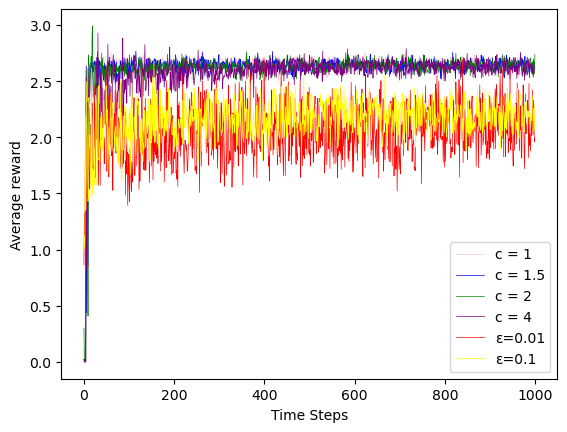

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n_arms = 10
n_steps = 1000
n_trials = 2000

c_values = [1, 1.5, 2, 4]
colors = ['pink', 'blue', 'green', 'purple']

P_arm = np.random.randn(n_arms)

for c, color in zip(c_values, colors): #리스트끼리 묶어서 반복문
    average_rewards = np.zeros(n_steps)

    for i in range(n_trials):
        Q_arm = np.zeros(n_arms)
        N_visits = np.zeros(n_arms)
        N_total = 0

        for j in range(n_steps):
            R_arm = np.random.normal(P_arm, 1, n_arms)
            ucb_values = Q_arm + c * np.sqrt(np.log(N_total + 1) / (N_visits + 0.000001)) #위의 식 구현 + 분모 0방지
            action = np.argmax(ucb_values) #ucb값 중 가장 큰 

            if N_visits[action] == 0:
                Q_arm[action] += R_arm[action]
            else:
                Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]

            N_visits[action] += 1
            N_total += 1

            if np.argmax(R_arm) == action:
                average_rewards[j] += (R_arm[action] - average_rewards[j]) / (i + 1)

    plt.plot(average_rewards, color=color, linewidth=0.5)

epsilon_values = [0.01, 0.1]
colors = ['red', 'yellow']

P_arm = np.random.randn(n_arms)

for epsilon, color in zip(epsilon_values, colors): # zip [(0.01, 'red'), ...] 이런 식으로 묶어줌
    average_rewards = np.zeros(n_steps)

    for i in range(n_trials):
        Q_arm = np.zeros(n_arms)
        N_visits = np.zeros(n_arms)

        for j in range(n_steps):
            R_arm = np.random.normal(P_arm, 1, n_arms)

            if epsilon > 0 and np.random.rand(1) < epsilon: #epsilion이 0이면 false
            # epsilon-greedy
                action = np.random.choice(n_arms,1)
            else: 
            # greedy
                action = np.random.choice(np.flatnonzero(Q_arm == np.max(Q_arm)))  
            
            if N_visits[action] == 0:
                Q_arm[action] += R_arm[action]
            else:
                Q_arm[action] += (R_arm[action] - Q_arm[action]) / N_visits[action]

            N_visits[action] += 1 # action 한 곳에 + 1

            if np.argmax(R_arm) == action:
                average_rewards[j] += (R_arm[action] - average_rewards[j]) / (i + 1)

    plt.plot(average_rewards, color=color, linewidth=0.5)
    
plt.legend(['c = 1', 'c = 1.5', 'c = 2', 'c = 4', 'ε=0.01','ε=0.1' ])
plt.xlabel('Time Steps')
plt.ylabel('Average reward')
plt.show()



